In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from matplotlib.ticker import MaxNLocator

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.5)

# Find all CSV files in the specified directory
csv_files = glob.glob("../../../03_results/reports/sc_sae_sweep/*.csv")
print(f"Found {len(csv_files)} CSV files")

# load all files into one dataframe
dfs = []
for file in csv_files:
    df = pd.read_csv(file, index_col=0)
    #filename separates data, and sae architecture with '_'
    if file.split('/')[-1].split('_')[0] in ['bricken', 'vanilla']:
        df['data'] = 'marrow'
        df['sae'] = file.split('/')[-1].split('_')[0]
    else:
        df['data'] = file.split('/')[-1].split('_')[0]
        df['sae'] = file.split('/')[-1].split('_')[1]
    df['name'] = '_'.join(file.split('/')[-1].split('_')[:-1])
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df

Found 240 CSV files


,loss,val_loss,epoch,reconstruction loss,number of active neurons,l1,scaling_factor,l1_weight,learning_rate,data,sae,name
0,2.030979e-03,1.881344e-02,0,2.400256e-07,1731,8137.862793,100,0.001,0.00001,mousegast,bricken,mousegast_bricken_100_0.001_1e-05
1,4.628582e-04,4.422493e-03,1,2.400256e-07,1731,8137.862793,100,0.001,0.00001,mousegast,bricken,mousegast_bricken_100_0.001_1e-05
2,2.373749e-04,2.303046e-03,2,2.400256e-07,1731,8137.862793,100,0.001,0.00001,mousegast,bricken,mousegast_bricken_100_0.001_1e-05
3,1.588348e-04,1.547622e-03,3,2.400256e-07,1731,8137.862793,100,0.001,0.00001,mousegast,bricken,mousegast_bricken_100_0.001_1e-05
4,1.140939e-04,1.113811e-03,4,2.400256e-07,1731,8137.862793,100,0.001,0.00001,mousegast,bricken,mousegast_bricken_100_0.001_1e-05
...,...,...,...,...,...,...,...,...,...,...,...,...
236799,7.814467e-08,7.737844e-07,995,1.243455e-08,3325,3751.187012,500,0.001,0.00010,marrow,bricken,bricken_500_0.001_0.0001
236800,7.740872e-08,7.672523e-07,996,1.243455e-08,3325,3751.187012,500,0.001,0.00010,marrow,bricken,bricken_500_0.001_0.0001
236801,7.752701e-08,7.678619e-07,997,1.243455e-08,3325,3751.187012,500,0.001,0.00010,marrow,bricken,bricken_500_0.001_0.0001
236802,7.792152e-08,7.715119e-07,998,1.243455e-08,3325,3751.187012,500,0.001,0.00010,marrow,bricken,bricken_500_0.001_0.0001


In [6]:
# make l1_weight and learning_rate categoricals so that the colors will be consistent
df['l1_weight'] = df['l1_weight'].astype('category')
df['learning_rate'] = df['learning_rate'].astype('category')

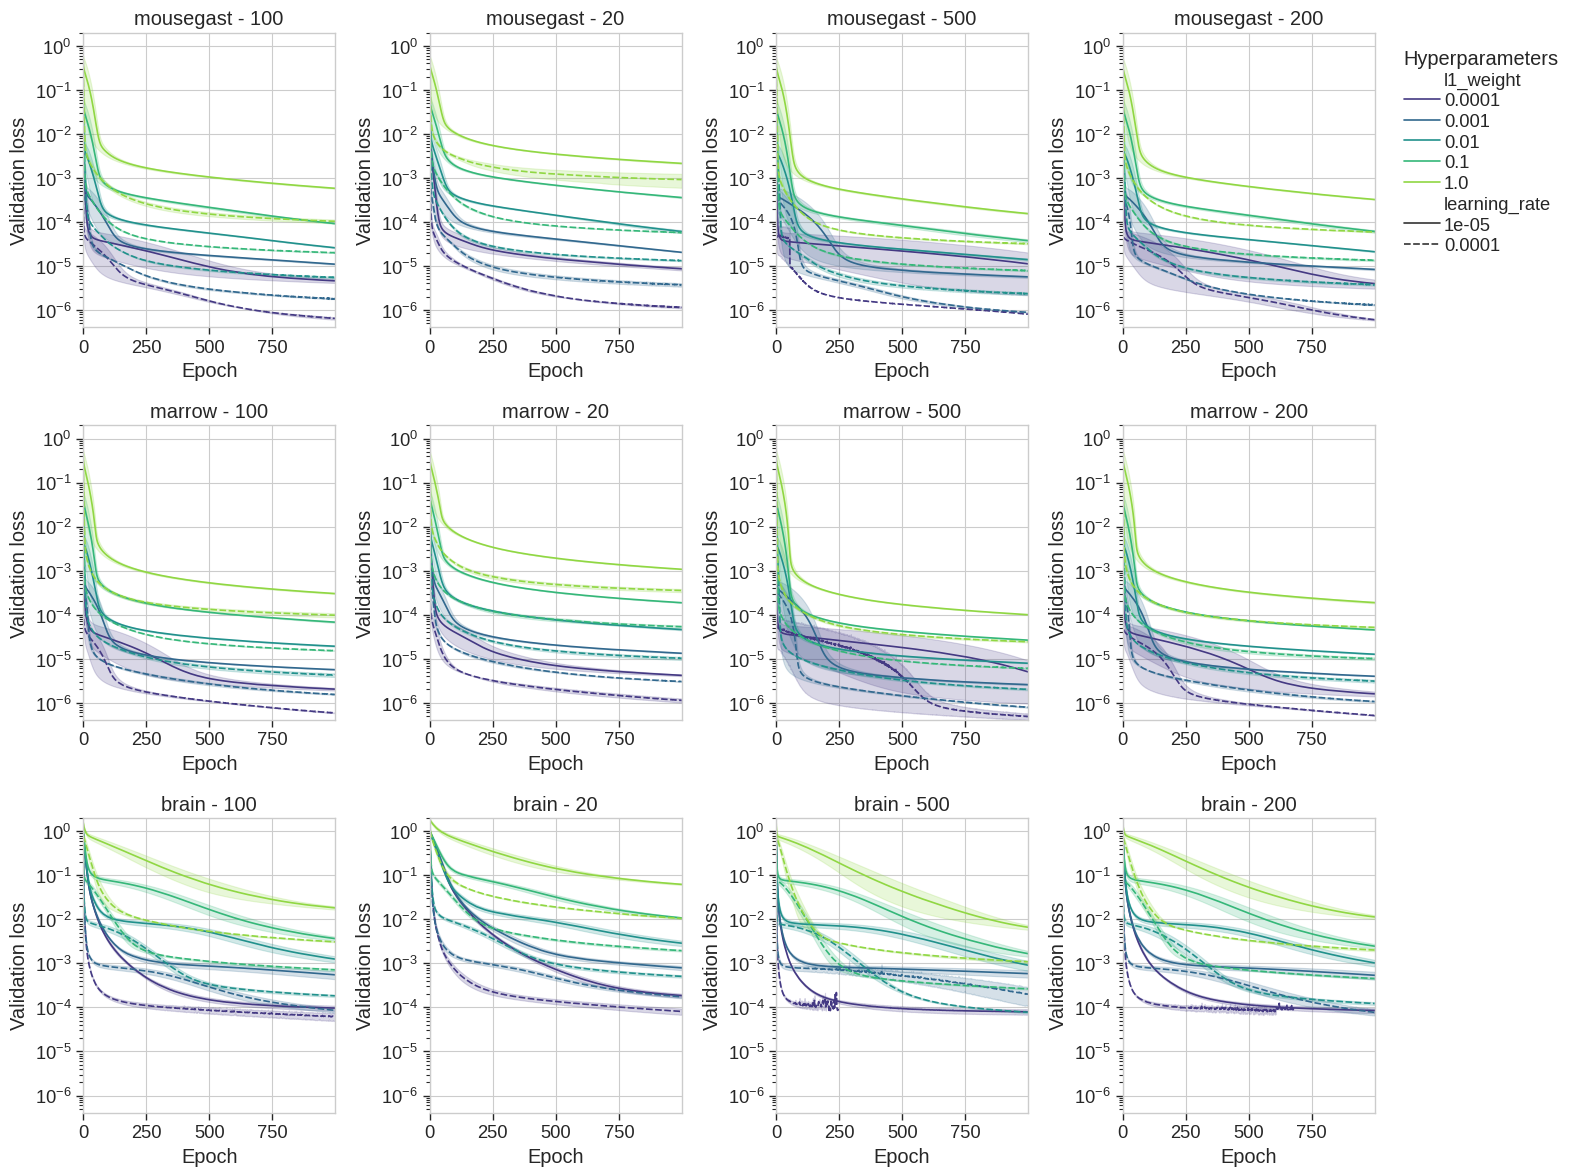

In [15]:
# create a figure with 3 subplots (one per dataset) and 4 rows
# each plot will show the loss curves (loss vs epoch), with the val_loss, reconstruction loss, l1, and number of active neurons as y-axis (per row)
# coloring should be by l1_weight and style by learning_rate
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

for i, data in enumerate(df['data'].unique()):
    for j, y in enumerate(df['scaling_factor'].unique()):
        # get the data for the current dataset and sae
        data_df = df[(df['data'] == data) & (df['scaling_factor'] == y)]
        # create a lineplot with hue by l1_weight and style by learning_rate
        sns.lineplot(data=data_df, x='epoch', y='val_loss', hue='l1_weight', style='learning_rate', ax=axes[i, j], palette='viridis')
        # set the title and labels
        axes[i, j].set_title(f"{data} - {y}")
        axes[i, j].set_xlabel("Epoch")
        axes[i, j].set_ylabel('Validation loss')
        # set the legend (only on the right)
        if j < 3:
            axes[i, j].legend().remove()
        else:
            if i != 0:
                axes[i, j].legend().remove()
            else:
                axes[i, j].legend(title='Hyperparameters', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, handletextpad=0.2, alignment='left', columnspacing=0.8, labelspacing=0.2)
        # set the x-axis limits
        axes[i, j].set_xlim(0, df['epoch'].max())
        axes[i, j].set_ylim(df['val_loss'].min(), df['val_loss'].max())
        axes[i, j].set_yscale('log')
plt.tight_layout()
plt.show()

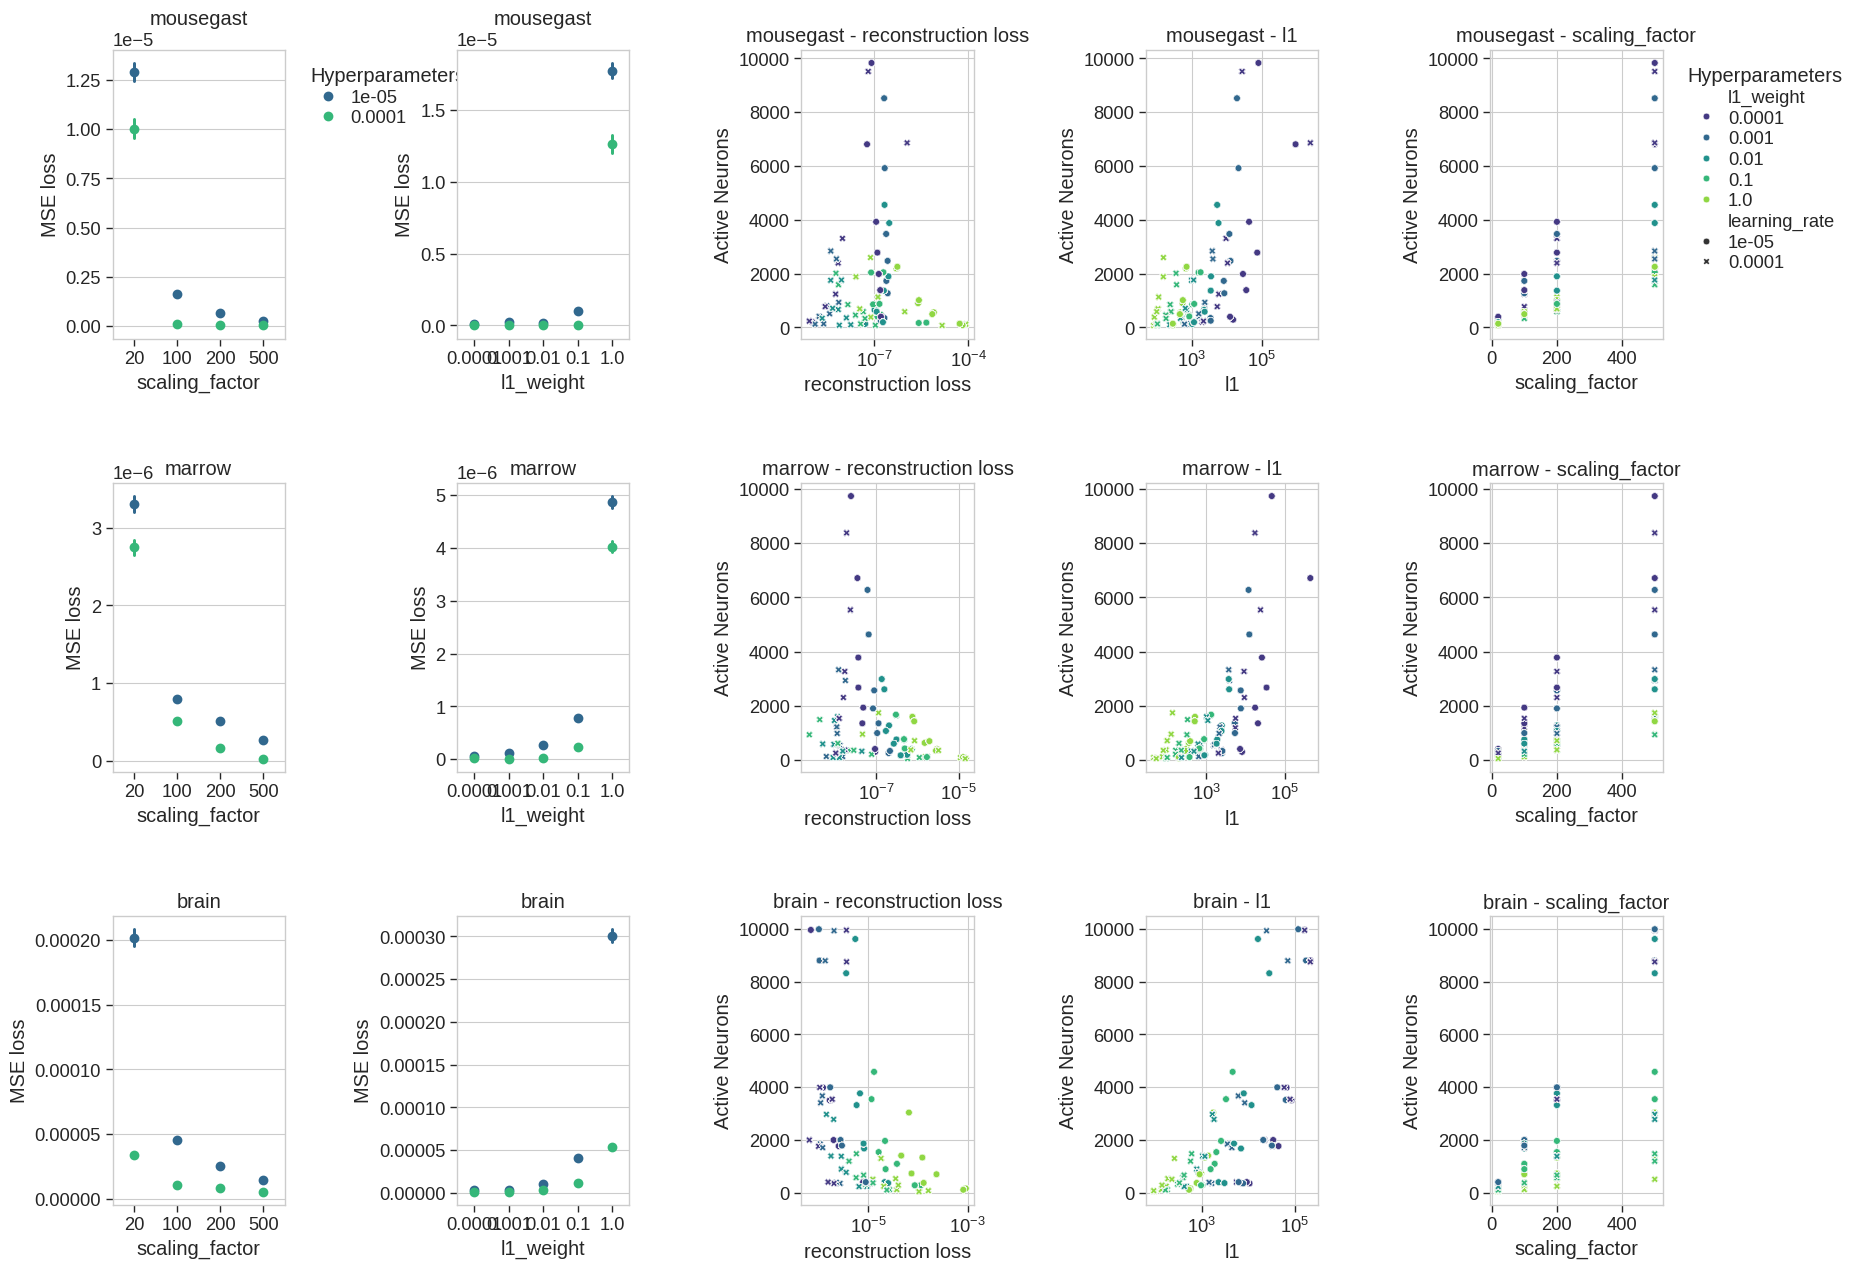

In [30]:
# next plot the number of active neurons against each loss: val_loss, reconstruction loss, l1 per dataset

fig, axes = plt.subplots(3, 5, figsize=(20, 15))
# add spacing
plt.subplots_adjust(wspace=1.0, hspace=0.5)

for i, data in enumerate(df['data'].unique()):
    data_df = df[(df['data'] == data)]
    # the first three plots are reconstruction loss vs scaling factor, l1_weight, and learning_rate
    for j, y in enumerate(['scaling_factor', 'l1_weight']):
        # create a lineplot with hue by l1_weight and style by learning_rate
        #sns.stripplot(data=data_df, x=y, y='reconstruction loss', hue='learning_rate', ax=axes[i, j], palette='viridis', alpha=0.2, legend=False)
        #sns.pointplot(data=data_df, x=y, y='reconstruction loss', hue='learning_rate', ax=axes[i, j], palette='viridis', linestyle="none", marker="_", markersize=10, errorbar=None)
        sns.pointplot(data=data_df, x=y, y='reconstruction loss', hue='learning_rate', ax=axes[i, j], palette='viridis', linestyle="none")
        # set the title and labels
        axes[i, j].set_title(f"{data}")
        axes[i, j].set_xlabel(y)
        axes[i, j].set_ylabel("MSE loss")
        # set the legend (only on the right)
        if j > 0:
            axes[i, j].legend().remove()
        else:
            if i != 0:
                axes[i, j].legend().remove()
            else:
                axes[i, j].legend(title='Hyperparameters', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, handletextpad=0.2, alignment='left', columnspacing=0.8, labelspacing=0.2)
        # set the x-axis limits
        #axes[i, j].set_xlim(0, np.max(data_df[y].values))
    for j, y in enumerate(['reconstruction loss', 'l1', 'scaling_factor']):
        # create a lineplot with hue by l1_weight and style by learning_rate
        #sns.lineplot(data=data_df, x=y, y='number of active neurons', hue='l1_weight', style='learning_rate', ax=axes[i, j+2], palette='viridis', markers=True)
        sns.scatterplot(data=data_df, x=y, y='number of active neurons', hue='l1_weight', style='learning_rate', ax=axes[i, j+2], palette='viridis')
        # set the title and labels
        axes[i, j+2].set_title(f"{data} - {y}")
        axes[i, j+2].set_xlabel(y)
        axes[i, j+2].set_ylabel("Active Neurons")
        # set the legend (only on the right)
        if j < 2:
            axes[i, j+2].set_xscale('log')
            axes[i, j+2].legend().remove()
        else:
            if i != 0:
                axes[i, j+2].legend().remove()
            else:
                axes[i, j+2].legend(title='Hyperparameters', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, handletextpad=0.2, alignment='left', columnspacing=0.8, labelspacing=0.2)
        # set the x-axis limits
        #axes[i, j+2].set_xlim(0, np.max(data_df[y].values))

In [74]:
# for comparison, load the sweep results from the simulation

ae_dir = "../../../03_results/models/largesim_ae_latent-150_depth-2_width-wide_seed-0/sae/"

# find all csv files in the specified directory that start with "losses"
csv_files = glob.glob(os.path.join(ae_dir, "losses_*.csv"))
print(f"Found {len(csv_files)} CSV files")
# load all files into one dataframe
dfs = []
for file in csv_files:
    temp = pd.read_csv(file)
    # rename the first column to "epoch"
    temp.rename(columns={temp.columns[0]: 'epoch'}, inplace=True)
    temp['scaling_factor'] = int(file.split('/')[-1].split('_')[1].split('x')[0])
    temp['l1_weight'] = float(file.split('/')[-1].split('_')[2].split('l1w')[1])
    temp['learning_rate'] = float(file.split('/')[-1].split('_')[3].split('lr')[1].split('.csv')[0])
    dfs.append(temp)
df_sim = pd.concat(dfs, ignore_index=True)
df_sim['data'] = 'simulation'
df_sim['data type'] = 'simulation'

#df_sim2 = pd.read_csv("../../../03_results/reports/files/sim2L_sae_metrics_pearson_latent-150.csv")
df_sim2 = pd.read_csv("../../../03_results/reports/files/sim2L_sae_metrics_pearson_latent-150_nactive.csv")
#df_sim2 = df_sim2[df_sim2['latent_dim'] == 150]
# rename hidden_factor to scaling_factor
df_sim2.rename(columns={'hidden_factor': 'scaling_factor'}, inplace=True)
n_active = []
recon_loss = []
for i in range(len(df_sim)):
    try:
        # get the number of active neurons from the file name
        row = df_sim2[(df_sim2['scaling_factor'] == df_sim['scaling_factor'].iloc[i]) & (df_sim2['l1_weight'] == df_sim['l1_weight'].iloc[i]) & (df_sim2['lr'] == df_sim['learning_rate'].iloc[i])]
        n_active.append(row['number of active neurons'].values[0])
        recon_loss.append(row['reconstruction loss'].values[0])
    except:
        # if the row is not found, append NaN
        n_active.append(np.nan)
        recon_loss.append(np.nan)
df_sim['number of active neurons'] = n_active
df_sim['reconstruction loss'] = recon_loss
#df_sim['reconstruction loss'] = df_sim['val_loss'].copy()
# set l1_weight and scaling factors as categorical
df_sim['l1_weight'] = df_sim['l1_weight'].astype('category')
df_sim['scaling_factor'] = df_sim['scaling_factor'].astype('category')
df_sim

Found 16 CSV files


,epoch,loss,val_loss,scaling_factor,l1_weight,learning_rate,data,data type,number of active neurons,reconstruction loss
0,0,343.258045,53.369724,20,0.100,0.000001,simulation,simulation,NaN,NaN
1,1,34.174059,22.068984,20,0.100,0.000001,simulation,simulation,NaN,NaN
2,2,15.126487,10.032611,20,0.100,0.000001,simulation,simulation,NaN,NaN
3,3,7.074182,5.212112,20,0.100,0.000001,simulation,simulation,NaN,NaN
4,4,4.217542,3.704380,20,0.100,0.000001,simulation,simulation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3084,62,0.162419,0.274608,200,0.001,0.000010,simulation,simulation,23563.0,29.315405
3085,63,0.158161,0.137537,200,0.001,0.000010,simulation,simulation,23563.0,29.315405
3086,64,0.162947,0.133726,200,0.001,0.000010,simulation,simulation,23563.0,29.315405
3087,65,0.157408,0.218606,200,0.001,0.000010,simulation,simulation,23563.0,29.315405


In [75]:
# compare real data and simulated data by plotting val_loss against scaling factor
df['data type'] = 'real'
df_compare = pd.concat([df, df_sim], ignore_index=True)
df_compare['data type'] = df_compare['data type'].astype('category')
df_compare['scaling_factor'] = df_compare['scaling_factor'].astype('category')
df_compare['l1_weight'] = df_compare['l1_weight'].astype('category')
df_compare['learning_rate'] = df_compare['learning_rate'].astype('category')
df_compare

,loss,val_loss,epoch,reconstruction loss,number of active neurons,l1,scaling_factor,l1_weight,learning_rate,data,sae,name,data type
0,0.002031,0.018813,0,2.400256e-07,1731.0,8137.862793,100,0.001,0.00001,mousegast,bricken,mousegast_bricken_100_0.001_1e-05,real
1,0.000463,0.004422,1,2.400256e-07,1731.0,8137.862793,100,0.001,0.00001,mousegast,bricken,mousegast_bricken_100_0.001_1e-05,real
2,0.000237,0.002303,2,2.400256e-07,1731.0,8137.862793,100,0.001,0.00001,mousegast,bricken,mousegast_bricken_100_0.001_1e-05,real
3,0.000159,0.001548,3,2.400256e-07,1731.0,8137.862793,100,0.001,0.00001,mousegast,bricken,mousegast_bricken_100_0.001_1e-05,real
4,0.000114,0.001114,4,2.400256e-07,1731.0,8137.862793,100,0.001,0.00001,mousegast,bricken,mousegast_bricken_100_0.001_1e-05,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239888,0.162419,0.274608,62,2.931541e+01,23563.0,NaN,200,0.001,0.00001,simulation,NaN,NaN,simulation
239889,0.158161,0.137537,63,2.931541e+01,23563.0,NaN,200,0.001,0.00001,simulation,NaN,NaN,simulation
239890,0.162947,0.133726,64,2.931541e+01,23563.0,NaN,200,0.001,0.00001,simulation,NaN,NaN,simulation
239891,0.157408,0.218606,65,2.931541e+01,23563.0,NaN,200,0.001,0.00001,simulation,NaN,NaN,simulation


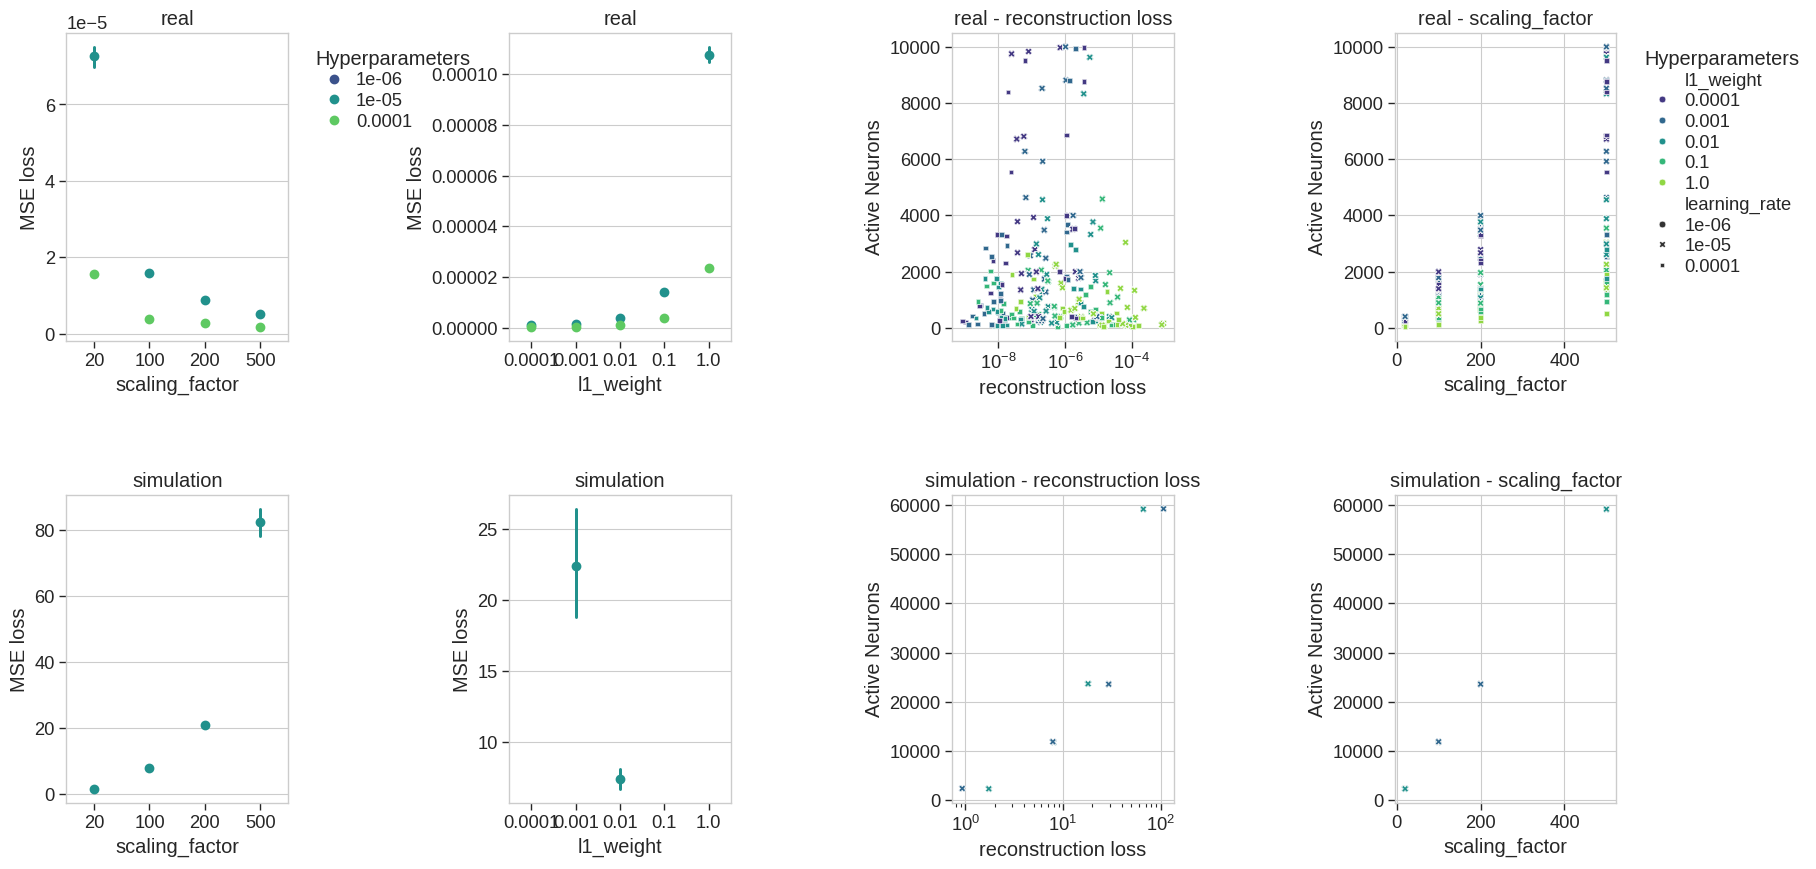

In [76]:
# same plot as above but with the simulation data included and comparing real and simulated data
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
# add spacing
plt.subplots_adjust(wspace=1.0, hspace=0.5)

for i, data in enumerate(df_compare['data type'].unique()):
    data_df = df_compare[(df_compare['data type'] == data)]
    # the first three plots are reconstruction loss vs scaling factor, l1_weight, and learning_rate
    for j, y in enumerate(['scaling_factor', 'l1_weight']):
        # create a lineplot with hue by l1_weight and style by learning_rate
        #sns.stripplot(data=data_df, x=y, y='reconstruction loss', hue='learning_rate', ax=axes[i, j], palette='viridis', alpha=0.2, legend=False)
        #sns.pointplot(data=data_df, x=y, y='reconstruction loss', hue='learning_rate', ax=axes[i, j], palette='viridis', linestyle="none", marker="_", markersize=10, errorbar=None)
        sns.pointplot(data=data_df, x=y, y='reconstruction loss', hue='learning_rate', ax=axes[i, j], palette='viridis', linestyle="none")
        # set the title and labels
        axes[i, j].set_title(f"{data}")
        axes[i, j].set_xlabel(y)
        axes[i, j].set_ylabel("MSE loss")
        # set the legend (only on the right)
        if j > 0:
            axes[i, j].legend().remove()
        else:
            if i != 0:
                axes[i, j].legend().remove()
            else:
                axes[i, j].legend(title='Hyperparameters', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, handletextpad=0.2, alignment='left', columnspacing=0.8, labelspacing=0.2)
        # set the x-axis limits
        #axes[i, j].set_xlim(0, np.max(data_df[y].values))
    for j, y in enumerate(['reconstruction loss', 'scaling_factor']):
        # create a lineplot with hue by l1_weight and style by learning_rate
        #sns.lineplot(data=data_df, x=y, y='number of active neurons', hue='l1_weight', style='learning_rate', ax=axes[i, j+2], palette='viridis', markers=True)
        sns.scatterplot(data=data_df, x=y, y='number of active neurons', hue='l1_weight', style='learning_rate',
                        ax=axes[i, j+2], palette='viridis')
        # set the title and labels
        axes[i, j+2].set_title(f"{data} - {y}")
        axes[i, j+2].set_xlabel(y)
        axes[i, j+2].set_ylabel("Active Neurons")
        # set the legend (only on the right)
        if j < 1:
            axes[i, j+2].set_xscale('log')
            axes[i, j+2].legend().remove()
        else:
            if i != 0:
                axes[i, j+2].legend().remove()
            else:
                axes[i, j+2].legend(title='Hyperparameters', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False,
                                    handletextpad=0.2, alignment='left', columnspacing=0.8, labelspacing=0.2)
        # set the x-axis limits
        #axes[i, j+2].set_xlim(0, np.max(data_df[y].values))
# save the figure
plt.show()
#plt.savefig("../../../03_results/reports/sc_sae_sweep/sae_sweep_scatter.png", dpi=300, bbox_inches='tight')

In [89]:
# what are quantile trhesholds for the reconstruction loss in the real data (per dataset)

threshold = 0.05
for dataset in df['data'].unique():
    df_data = df[df['data'] == dataset]
    # get the reconstruction loss lowest 5th percentile
    q5 = df_data['reconstruction loss'].quantile(threshold)
    q52 = df_data['number of active neurons'].quantile(threshold*5)
    df_data = df_data[(df_data['reconstruction loss'] < q5) & (df_data['number of active neurons'] < q52)]
    # now print the unique l1_weights and learning rates
    l1_weights = df_data['l1_weight'].unique()
    learning_rates = df_data['learning_rate'].unique()
    print(f"Dataset: {dataset}")
    if str(int(threshold*100))[-1] == '1':
        print(f"{int(threshold*100)}st percentile: reconstruction loss {q5}, number of active neurons {q52}")
    elif str(int(threshold*100))[-1] == '2':
        print(f"{int(threshold*100)}nd percentile reconstruction loss, number of active neurons {q5}, {q52}")
    else:
        print(f"{int(threshold*100)}th percentile reconstruction loss, number of active neurons {q5}, {q52}")
    print(f"l1_weights: {l1_weights}")
    print(f"learning_rates: {learning_rates}")
    print("\n")

Dataset: mousegast
5th percentile reconstruction loss, number of active neurons 1.6841850136728451e-09, 343.0
l1_weights: [0.0001, 0.0010]
Categories (5, float64): [0.0001, 0.0010, 0.0100, 0.1000, 1.0000]
learning_rates: [0.0001]
Categories (2, float64): [0.00001, 0.00010]


Dataset: marrow
5th percentile reconstruction loss, number of active neurons 8.962713393679493e-09, 318.75
l1_weights: [0.001]
Categories (5, float64): [0.0001, 0.0010, 0.0100, 0.1000, 1.0000]
learning_rates: [0.0001]
Categories (2, float64): [0.00001, 0.00010]


Dataset: brain
5th percentile reconstruction loss, number of active neurons 1.0398534868727438e-06, 367.0
l1_weights: [], Categories (5, float64): [0.0001, 0.0010, 0.0100, 0.1000, 1.0000]
learning_rates: [], Categories (2, float64): [0.00001, 0.00010]




/tmp/ipykernel_2631970/1985139694.py:20: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(f"l1_weights: {l1_weights}")
/tmp/ipykernel_2631970/1985139694.py:21: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(f"learning_rates: {learning_rates}")
